In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
import pandas as pd

# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Penetración-poblacion.csv'

# Carga el archivo CSV en un DataFrame
df_Penetracion_poblacion = pd.read_csv(archivo_csv)

# Muestra las primeras 5 filas del DataFrame
print(f"Mostrando las primeras 5 filas de {archivo_csv}:")
print(df_Penetracion_poblacion.head())

Mostrando las primeras 5 filas de C:/Users/Usuario/PI_2/DATA_LIMPIO/Penetración-poblacion.csv:
    Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44
2  2024          2        Catamarca                     17.50
3  2024          2            Chaco                     11.78
4  2024          2           Chubut                     26.46


In [4]:
print(df_Penetracion_poblacion.describe())




               Año    Trimestre  Accesos por cada 100 hab
count  1000.000000  1000.000000               1000.000000
mean   2018.800000     2.464000                 15.727248
std       3.021445     1.114426                  9.240063
min    2014.000000     1.000000                  2.723000
25%    2016.000000     1.000000                  9.018188
50%    2019.000000     2.000000                 13.674812
75%    2021.000000     3.000000                 20.323973
max    2024.000000     4.000000                 52.236739


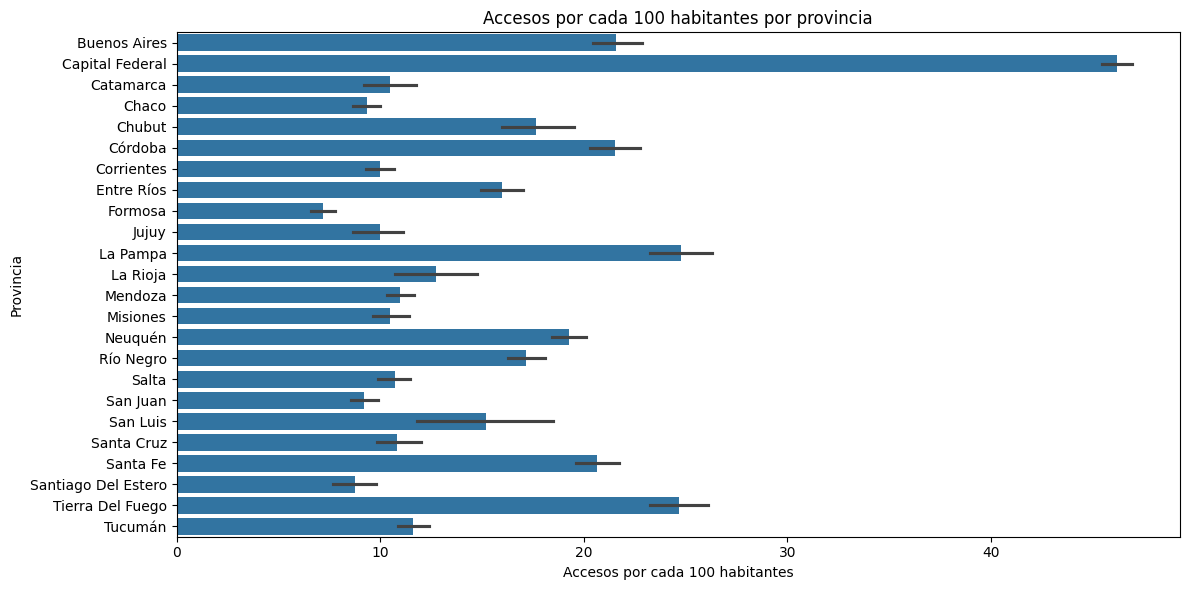

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df_Penetracion_poblacion, x='Accesos por cada 100 hab', y='Provincia', orient='h')
plt.title('Accesos por cada 100 habitantes por provincia')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Provincia')
plt.tight_layout()
plt.show()


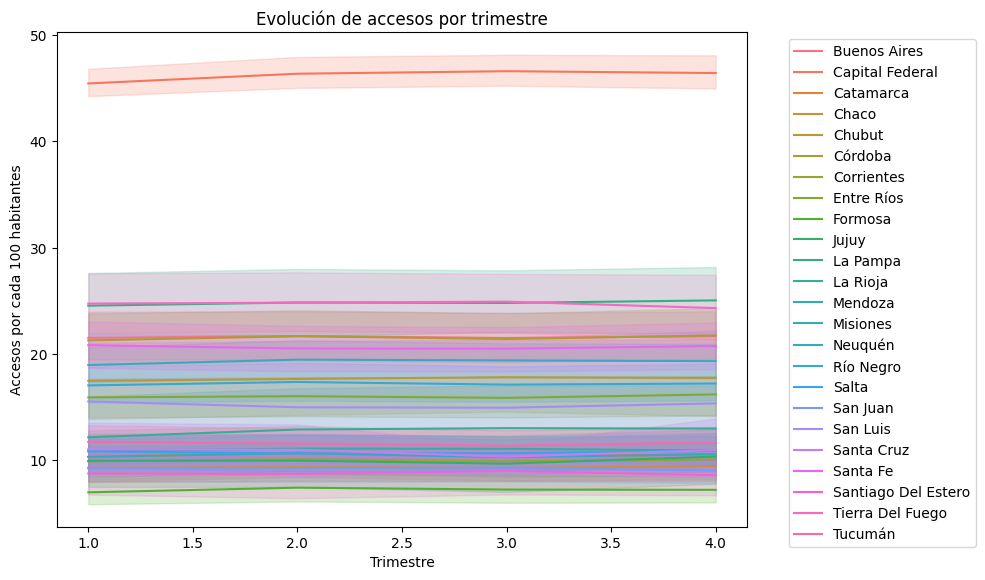

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_Penetracion_poblacion, x='Trimestre', y='Accesos por cada 100 hab', hue='Provincia')
plt.title('Evolución de accesos por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 habitantes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [7]:
provincia_especifica = df_Penetracion_poblacion[df_Penetracion_poblacion['Provincia'] == 'Buenos Aires']
print(provincia_especifica)


      Año  Trimestre     Provincia  Accesos por cada 100 hab
0    2024          2  Buenos Aires                 27.430000
24   2024          1  Buenos Aires                 27.800000
48   2023          4  Buenos Aires                 27.680000
72   2023          3  Buenos Aires                 27.500000
96   2023          2  Buenos Aires                 27.100000
120  2023          1  Buenos Aires                 26.810000
144  2022          4  Buenos Aires                 26.720000
168  2022          3  Buenos Aires                 26.370000
192  2022          2  Buenos Aires                 26.129271
216  2022          1  Buenos Aires                 25.563030
240  2021          4  Buenos Aires                 25.362514
264  2021          3  Buenos Aires                 23.969892
288  2021          2  Buenos Aires                 23.352474
312  2021          1  Buenos Aires                 22.998354
336  2020          4  Buenos Aires                 22.901512
360  2020          3  Bu

In [8]:
import pandas as pd

# Convertir "Año" a tipo entero para trabajar con fechas
df_Penetracion_poblacion['Año'] = df_Penetracion_poblacion['Año'].astype(int)

# Crear una columna de período a partir de "Año" y "Trimestre"
df_Penetracion_poblacion['Periodo'] = (
    pd.PeriodIndex(year=df_Penetracion_poblacion['Año'], quarter=df_Penetracion_poblacion['Trimestre'])
)

# Filtrar los datos entre 2018 y 2024
df_segmentado = df_Penetracion_poblacion[
    (df_Penetracion_poblacion['Año'] >= 2018) & (df_Penetracion_poblacion['Año'] <= 2024)
]

# Mostrar las primeras filas del DataFrame segmentado
print("Datos segmentados entre 2018 y 2024:")
print(df_segmentado.head())


Datos segmentados entre 2018 y 2024:
    Año  Trimestre        Provincia  Accesos por cada 100 hab Periodo
0  2024          2     Buenos Aires                     27.43  2024Q2
1  2024          2  Capital Federal                     47.44  2024Q2
2  2024          2        Catamarca                     17.50  2024Q2
3  2024          2            Chaco                     11.78  2024Q2
4  2024          2           Chubut                     26.46  2024Q2


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8444\3709227885.py:8: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  pd.PeriodIndex(year=df_Penetracion_poblacion['Año'], quarter=df_Penetracion_poblacion['Trimestre'])


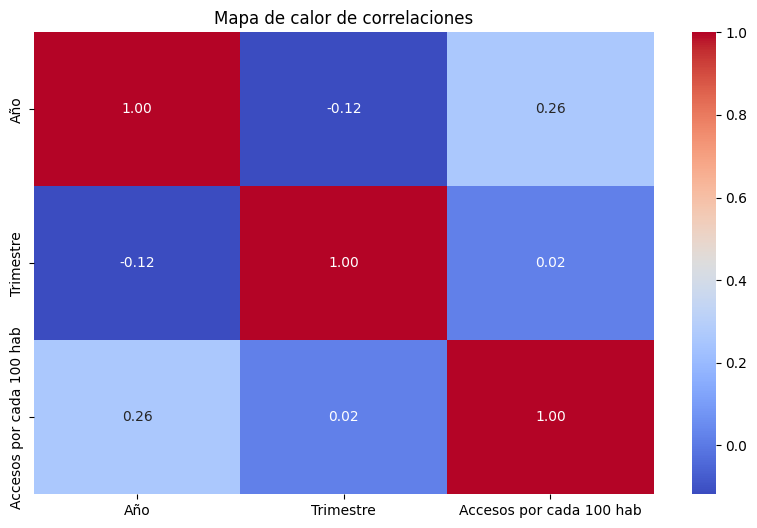

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular y graficar correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_segmentado[['Año', 'Trimestre', 'Accesos por cada 100 hab']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Mapa de calor de correlaciones")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8444\908387393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmentado['Periodo'] = df_segmentado['Periodo'].astype(str)


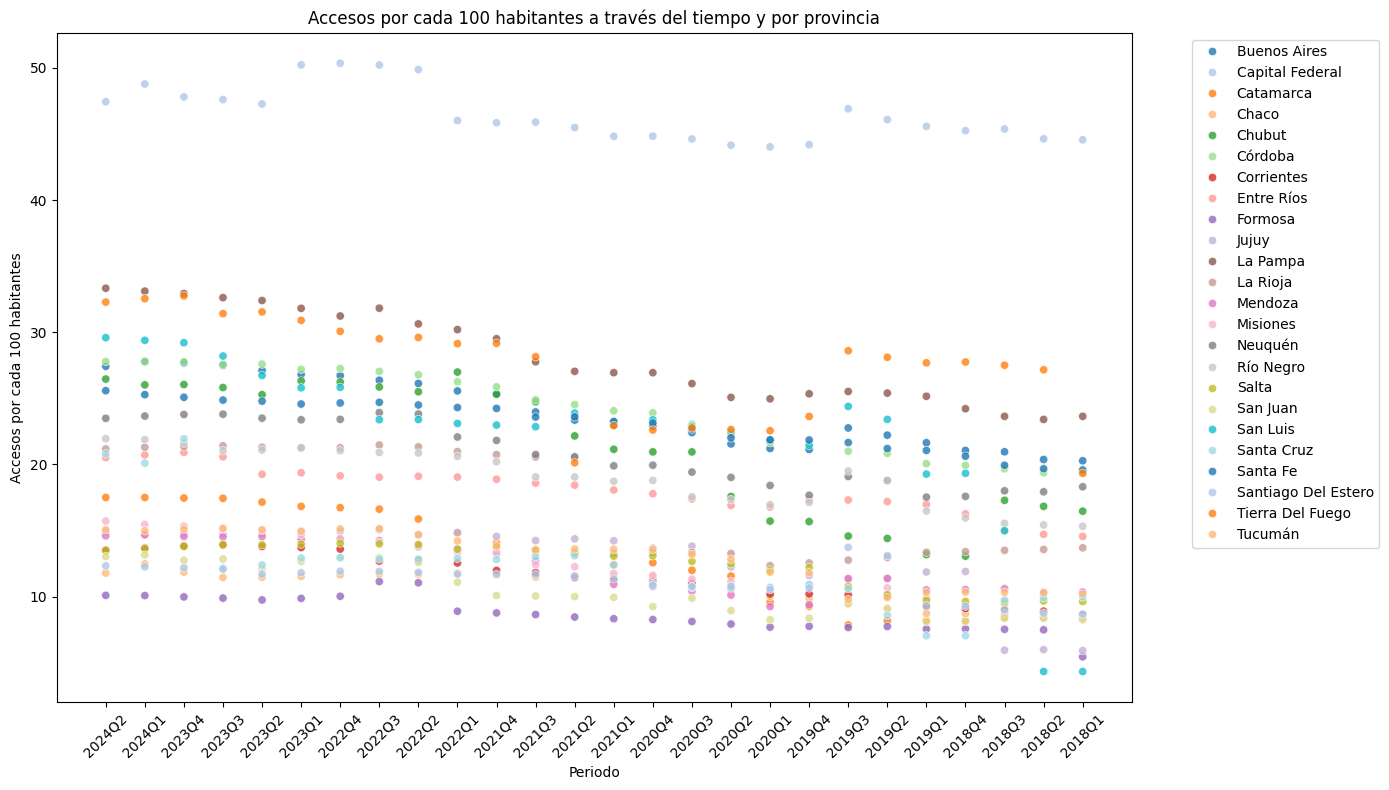

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir 'Periodo' a texto
df_segmentado['Periodo'] = df_segmentado['Periodo'].astype(str)

# Gráfico de puntos de dispersión (scatter plot)
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_segmentado,
    x='Periodo',  # Ya convertido a texto
    y='Accesos por cada 100 hab',
    hue='Provincia',
    palette='tab20',
    alpha=0.8
)
plt.title("Accesos por cada 100 habitantes a través del tiempo y por provincia")
plt.xlabel("Periodo")
plt.ylabel("Accesos por cada 100 habitantes")
plt.xticks(rotation=45)  # Rotar etiquetas para legibilidad
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


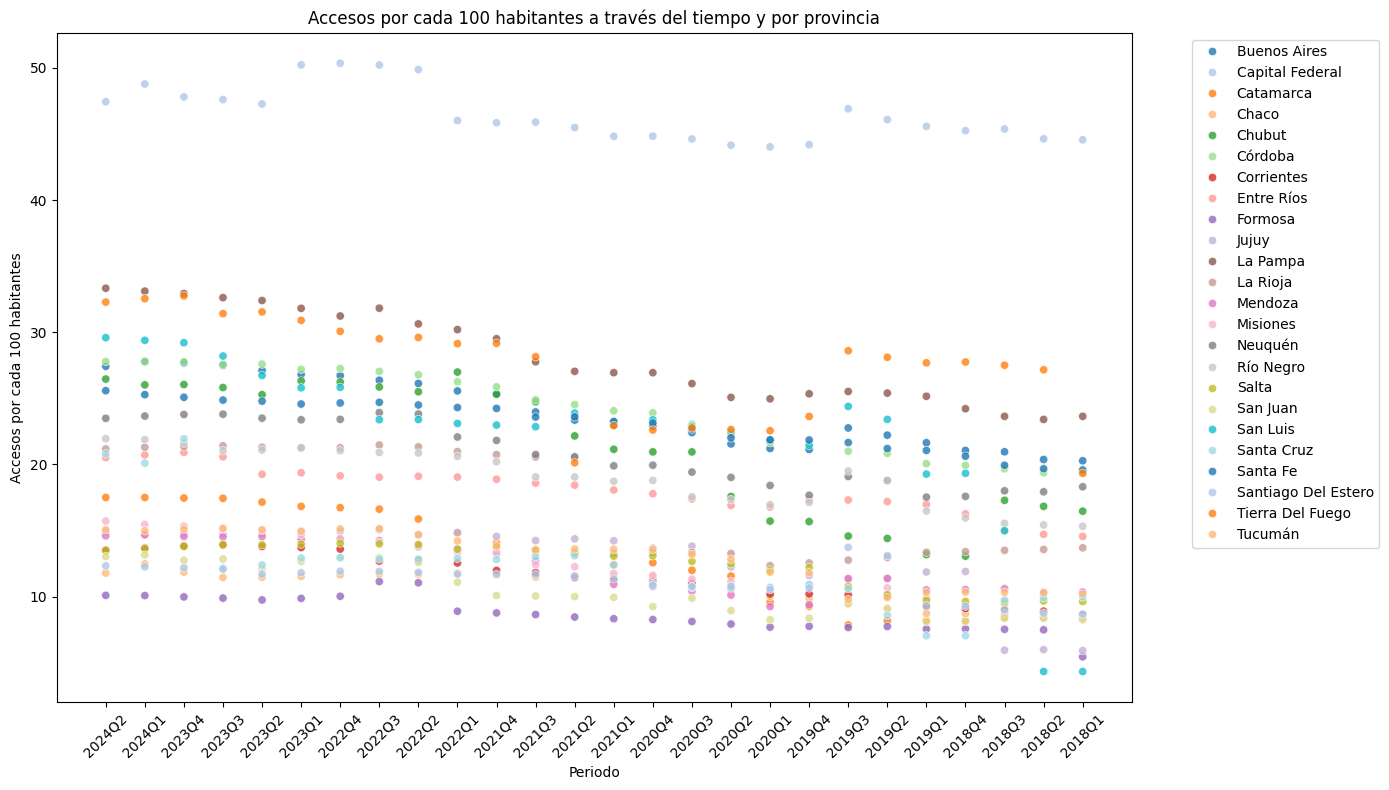

In [14]:
# Convertir 'Periodo' a texto de forma segura usando .loc
df_segmentado.loc[:, 'Periodo'] = df_segmentado['Periodo'].astype(str)

# Gráfico de puntos de dispersión (scatter plot)
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_segmentado,
    x='Periodo',  # Ya convertido a texto
    y='Accesos por cada 100 hab',
    hue='Provincia',
    palette='tab20',
    alpha=0.8
)
plt.title("Accesos por cada 100 habitantes a través del tiempo y por provincia")
plt.xlabel("Periodo")
plt.ylabel("Accesos por cada 100 habitantes")
plt.xticks(rotation=45)  # Rotar etiquetas para legibilidad
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
# Sobrescribir el archivo original con las transformaciones realizadas
df_Penetracion_poblacion.to_csv(archivo_csv, index=False)

print(f"Las transformaciones se han guardado en el archivo original: {archivo_csv}")


Las transformaciones se han guardado en el archivo original: C:/Users/Usuario/PI_2/DATA_LIMPIO/Penetración-poblacion.csv
